In [31]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import plot

In [13]:
timesData = pd.read_csv('../data/raw/word_test.csv')
timesData

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


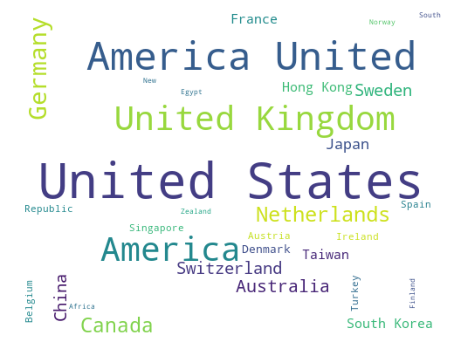

In [11]:
x2011 = timesData.country[timesData.year == 2011]

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x2011))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [48]:
import random
weights = [random.randint(1, 50) for i in range(len(timesData.country.value_counts()))]
data = go.Scatter(x=[random.random() for i in range(20)],
                 y=[random.random() for i in range(20)],
                 mode='text',
                 text=timesData.country.unique(),
                 marker={'opacity': 0.3},
                 textfont={'size': weights,
                           'color': [
    "#636EFA","#EF553B","#00CC96","#AB63FA","#19D3F3",
    "#E763FA", "#FECB52","#FFA15A","#FF6692","#B6E880", "teal"
  ]})
layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                    'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
fig = go.Figure(data=[data], layout=layout)
fig.update_layout(
 title="Requested Stock Info",
 yaxis_title=f"Most Talked About",
 paper_bgcolor='rgba(0,0,0,0)',
 plot_bgcolor='rgba(0,0,0,0)'
 )

fig.write_html('templates/word.html')

'temp-plot.html'

In [15]:
import os
import shutil
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys   
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [16]:
Initial_path = 'C:\\Users\\Donley\\Documents\\GA_TECH\\SUBMISSIONS\\demo-project'
filename = max([Initial_path + "\\" + f for f in os.listdir(Initial_path)],key=os.path.getctime)
shutil.move(filename,os.path.join(Initial_path,r"trends.csv"))

In [19]:

    
def getDownLoadedFileName(waitTime, symbol):
    driver = webdriver.Firefox(executable_path= "geckodriver.exe")
    driver.maximize_window()
    driver.get(f'https://trends.google.com/trends/explore?date=today%205-y&geo=US&q={symbol}')
    try:
        WebDriverWait(driver, timeout).until(EC.visibility_of_element_located((By.CLASS_NAME, "explorepage-content content _md")))
    except TimeoutException:
        driver.quit()
    download = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]/i')
    download.click()
    driver.execute_script("window.open()")
    WebDriverWait(driver,10).until(EC.new_window_is_opened)
    driver.switch_to.window(driver.window_handles[-1])
    driver.get("about:downloads")

    endTime = time.time()+waitTime
    while True:
        try:
            fileName = driver.execute_script("return document.querySelector('#contentAreaDownloadsView .downloadMainArea .downloadContainer description:nth-of-type(1)').value")
            if fileName:
                return fileName
        except:
            pass
        time.sleep(1)
        if time.time() > endTime:
            break

In [20]:
getDownLoadedFileName(1, 'TSLA')

NameError: name 'timeout' is not defined